# Task No-2 Unsupervised ML

## Author : Sangharsh patil 

### Importing libraries 

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

### Reading Data 

In [50]:
iris_data= pd.read_csv("iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
data=iris_data.drop('Id', axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
df=data.iloc[:,:-1]
data1=df.values

In [53]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

### No of optimum cluster

In [54]:
wcss=[]
    
for k in range(1,10):
        km=KMeans(n_clusters=k, random_state=49)
        km.fit(df)
        wcss.append(km.inertia_)

### Elbow Plot

Text(0, 0.5, 'Within sum of square')

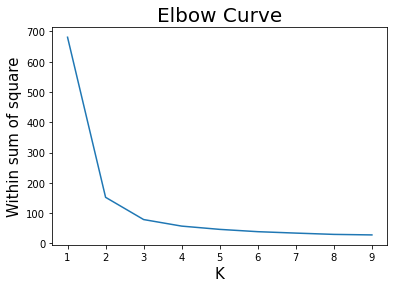

In [55]:
plt.plot(range(1,10),wcss)
plt.title("Elbow Curve", fontsize=20)
plt.xlabel("K", fontsize=15)
plt.ylabel("Within sum of square",fontsize=15)

In [56]:
km=KMeans(n_clusters=3,random_state=49)

In [57]:
y_pred=km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [64]:
km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
df['cluster']=y_pred

In [59]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
df.cluster.unique()

array([0, 1, 2])

### Plotting Scatter Plot

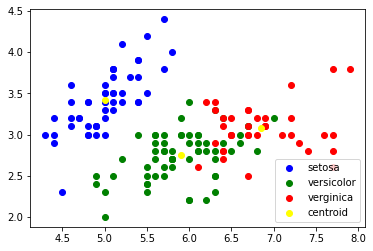

In [71]:
plt.scatter(data1[y_pred==0,0],data1[y_pred==0,1],color='blue',label='setosa')
plt.scatter(data1[y_pred==1,0],data1[y_pred==1,1],color='green',label='versicolor')
plt.scatter(data1[y_pred==2,0],data1[y_pred==2,1],color='red', label='verginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',label='centroid')
plt.legend()
plt.show()